# Importing Libary functions

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading of Dataset

In [13]:
df=pd.read_csv("./nba_elo.csv")

In [14]:
df

date  season  neutral playoff team1 team2     elo1_pre  \
0      1946-11-01    1947        0     NaN   TRH   NYK  1300.000000   
1      1946-11-02    1947        0     NaN   DTF   WSC  1300.000000   
2      1946-11-02    1947        0     NaN   PRO   BOS  1300.000000   
3      1946-11-02    1947        0     NaN   STB   PIT  1300.000000   
4      1946-11-02    1947        0     NaN   CHS   NYK  1300.000000   
...           ...     ...      ...     ...   ...   ...          ...   
71945  2022-04-09    2022        0     NaN   PHO   SAC  1736.286086   
71946  2022-04-09    2022        0     NaN   BRK   IND  1516.736537   
71947  2022-04-09    2022        0     NaN   LAC   OKC  1450.954385   
71948  2022-04-09    2022        0     NaN   DEN   LAL  1565.383681   
71949  2022-04-09    2022        0     NaN   NYK   TOR  1525.449216   

          elo2_pre  elo_prob1  elo_prob2  ...  carm-elo2_post  raptor1_pre  \
0      1300.000000   0.640065   0.359935  ...             NaN          NaN   
1      1300.000000   0.640065   0.359935  ...             NaN          NaN   
2      1300.000000   0.640065   0.359935  ...             NaN          NaN   
3      1300.000000   0.640065   0.359935  ...             NaN          NaN   
4      1306.723300   0.631101   0.368899  ...             NaN          NaN   
...            ...        ...        ...  ...             ...          ...   
71945  1367.535451   0.936929   0.063071  ...             NaN  1672.366492   
71946  1407.236023   0.769587   0.230413  ...             NaN  1634.257294   
71947  1310.740536   0.799437   0.200563  ...             NaN  1519.089847   
71948  1431.044285   0.793961   0.206039  ...             NaN  1642.197479   
71949  1580.054882   0.564958   0.435042  ...             NaN  1529.201138   

       raptor2_pre  raptor_prob1  raptor_prob2  score1  score2  quality  \
0              NaN           NaN           NaN    66.0    68.0        0   
1              NaN           NaN           NaN    33.0    50.0        0   
2              NaN           NaN           NaN    59.0    53.0        0   
3              NaN           NaN           NaN    56.0    51.0        0   
4              NaN           NaN           NaN    63.0    47.0        0   
...            ...           ...           ...     ...     ...      ...   
71945  1452.996602      0.863492      0.136508     NaN     NaN       72   
71946  1485.908902      0.800594      0.199406     NaN     NaN       72   
71947  1280.237620      0.871929      0.128071     NaN     NaN       12   
71948  1496.557168      0.873609      0.126391     NaN     NaN       76   
71949  1571.329893      0.573171      0.426829     NaN     NaN       71   

       importance  total_rating  
0             NaN           NaN  
1             NaN           NaN  
2             NaN           NaN  
3             NaN           NaN  
4             NaN           NaN  
...           ...           ...  
71945         1.0          37.0  
71946        12.0          42.0  
71947         4.0           8.0  
71948         2.0          39.0  
71949         5.0          38.0  

[71950 rows x 27 columns]

# Exploratory Data Analysis 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71950 entries, 0 to 71949
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            71950 non-null  object 
 1   season          71950 non-null  int64  
 2   neutral         71950 non-null  int64  
 3   playoff         4537 non-null   object 
 4   team1           71950 non-null  object 
 5   team2           71950 non-null  object 
 6   elo1_pre        71950 non-null  float64
 7   elo2_pre        71950 non-null  float64
 8   elo_prob1       71950 non-null  float64
 9   elo_prob2       71950 non-null  float64
 10  elo1_post       71825 non-null  float64
 11  elo2_post       71825 non-null  float64
 12  carm-elo1_pre   5249 non-null   float64
 13  carm-elo2_pre   5249 non-null   float64
 14  carm-elo_prob1  5249 non-null   float64
 15  carm-elo_prob2  5249 non-null   float64
 16  carm-elo1_post  5249 non-null   float64
 17  carm-elo2_post  5249 non-null  

In [16]:
df.count()

date              71950
season            71950
neutral           71950
playoff            4537
team1             71950
team2             71950
elo1_pre          71950
elo2_pre          71950
elo_prob1         71950
elo_prob2         71950
elo1_post         71825
elo2_post         71825
carm-elo1_pre      5249
carm-elo2_pre      5249
carm-elo_prob1     5249
carm-elo_prob2     5249
carm-elo1_post     5249
carm-elo2_post     5249
raptor1_pre        4856
raptor2_pre        4856
raptor_prob1       4856
raptor_prob2       4856
score1            71825
score2            71825
quality           71950
importance         1230
total_rating       1230
dtype: int64

In [17]:
df.size

1942650

In [18]:
df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

# Conversion of Variables

In [21]:
df.isna().sum()

date                  0
season                0
neutral               0
playoff           67413
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post           125
elo2_post           125
carm-elo1_pre     66701
carm-elo2_pre     66701
carm-elo_prob1    66701
carm-elo_prob2    66701
carm-elo1_post    66701
carm-elo2_post    66701
raptor1_pre       67094
raptor2_pre       67094
raptor_prob1      67094
raptor_prob2      67094
score1              125
score2              125
quality               0
importance        70720
total_rating      70720
dtype: int64

# Null value removal

In [30]:
df=df.dropna()

In [32]:
df.isna().sum()

date         0
season       0
neutral      0
team1        0
team2        0
elo1_pre     0
elo2_pre     0
elo_prob1    0
elo_prob2    0
elo1_post    0
elo2_post    0
score1       0
score2       0
quality      0
dtype: int64

# View table

In [33]:
df

date  season  neutral team1 team2     elo1_pre     elo2_pre  \
0      1946-11-01    1947        0   TRH   NYK  1300.000000  1300.000000   
1      1946-11-02    1947        0   DTF   WSC  1300.000000  1300.000000   
2      1946-11-02    1947        0   PRO   BOS  1300.000000  1300.000000   
3      1946-11-02    1947        0   STB   PIT  1300.000000  1300.000000   
4      1946-11-02    1947        0   CHS   NYK  1300.000000  1306.723300   
...           ...     ...      ...   ...   ...          ...          ...   
71820  2022-03-25    2022        0   ATL   GSW  1517.216652  1599.366623   
71821  2022-03-25    2022        0   MIA   NYK  1596.061104  1509.542037   
71822  2022-03-25    2022        0   MIN   DAL  1597.502982  1591.385195   
71823  2022-03-25    2022        0   POR   HOU  1338.974457  1289.062475   
71824  2022-03-25    2022        0   LAC   PHI  1469.063530  1584.325756   

       elo_prob1  elo_prob2    elo1_post    elo2_post  score1  score2  quality  
0       0.640065   0.359935  1293.276700  1306.723300    66.0    68.0        0  
1       0.640065   0.359935  1279.618900  1320.381100    33.0    50.0        0  
2       0.640065   0.359935  1305.154200  1294.845800    59.0    53.0        0  
3       0.640065   0.359935  1304.690800  1295.309200    56.0    51.0        0  
4       0.631101   0.368899  1309.652100  1297.071200    63.0    47.0        0  
...          ...        ...          ...          ...     ...     ...      ...  
71820   0.525666   0.474334  1527.515718  1589.067557   121.0   110.0       71  
71821   0.745298   0.254702  1580.153925  1525.449216   103.0   111.0       67  
71822   0.648138   0.351862  1608.496156  1580.392021   116.0    95.0       75  
71823   0.703279   0.296721  1313.709575  1314.327357   106.0   125.0        0  
71824   0.478050   0.521950  1450.954385  1602.434902    97.0   122.0       63  

[71825 rows x 14 columns]

In [34]:
df.dtypes

date          object
season         int64
neutral        int64
team1         object
team2         object
elo1_pre     float64
elo2_pre     float64
elo_prob1    float64
elo_prob2    float64
elo1_post    float64
elo2_post    float64
score1       float64
score2       float64
quality        int64
dtype: object

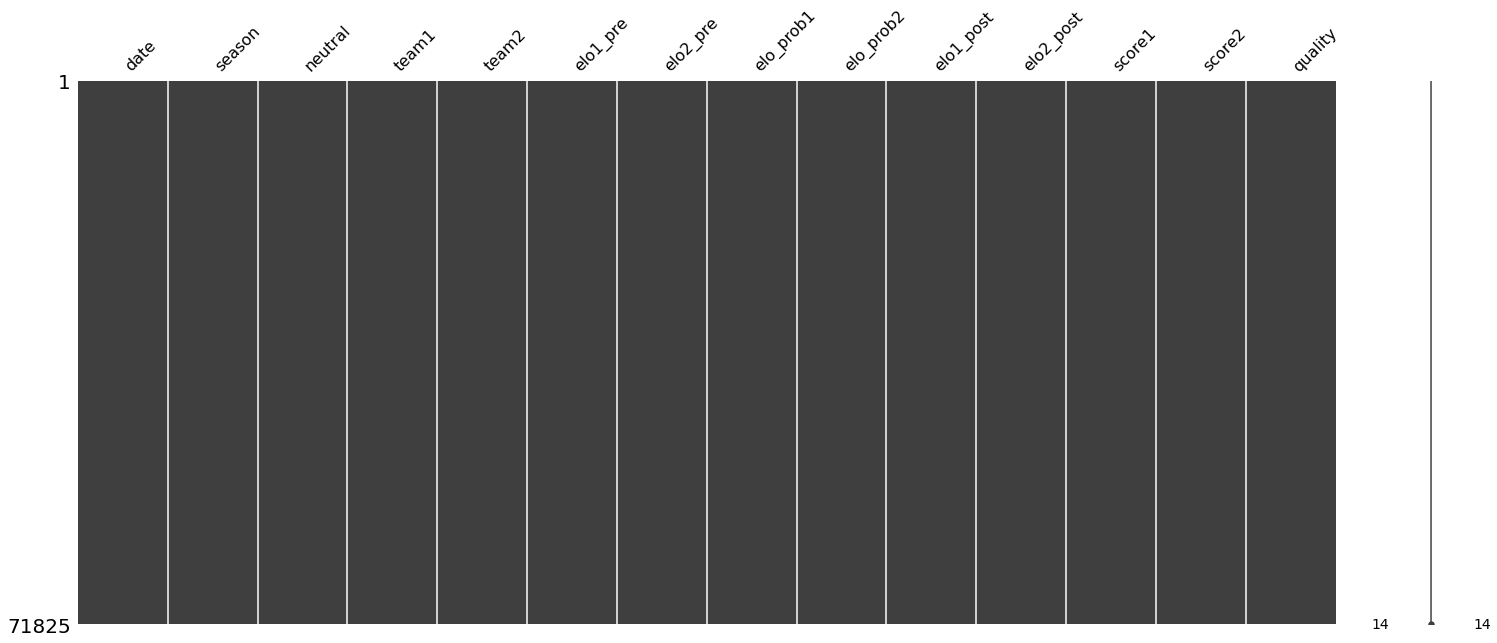

In [39]:
msno.matrix(df)

plt.show()

# Statistical Description

In [40]:
df.describe()

season       neutral      elo1_pre      elo2_pre     elo_prob1  \
count  71825.000000  71825.000000  71825.000000  71825.000000  71825.000000   
mean    1991.902332      0.002854   1497.192721   1497.425222      0.620904   
std       19.291476      0.053348    112.130162    111.575872      0.178147   
min     1947.000000      0.000000   1105.617800   1091.644500      0.062616   
25%     1976.000000      0.000000   1419.678600   1419.908400      0.498333   
50%     1994.000000      0.000000   1502.668500   1503.611700      0.639836   
75%     2008.000000      0.000000   1577.823200   1577.423927      0.759358   
max     2022.000000      1.000000   1855.779115   1865.449075      0.981685   

          elo_prob2     elo1_post     elo2_post        score1        score2  \
count  71825.000000  71825.000000  71825.000000  71825.000000  71825.000000   
mean       0.379096   1497.044257   1497.573686    105.185701    101.612363   
std        0.178147    112.587264    111.764575     14.812973     14.355050   
min        0.018315   1100.291900   1085.774400      2.000000      0.000000   
25%        0.240642   1419.039900   1420.067400     95.000000     92.000000   
50%        0.360164   1502.731700   1503.530600    105.000000    102.000000   
75%        0.501667   1577.921300   1577.853500    115.000000    111.000000   
max        0.937384   1860.313175   1865.449075    184.000000    186.000000   

            quality  
count  71825.000000  
mean      45.110811  
std       28.889378  
min        0.000000  
25%       20.000000  
50%       44.000000  
75%       69.000000  
max      100.000000

# Data Vizualization

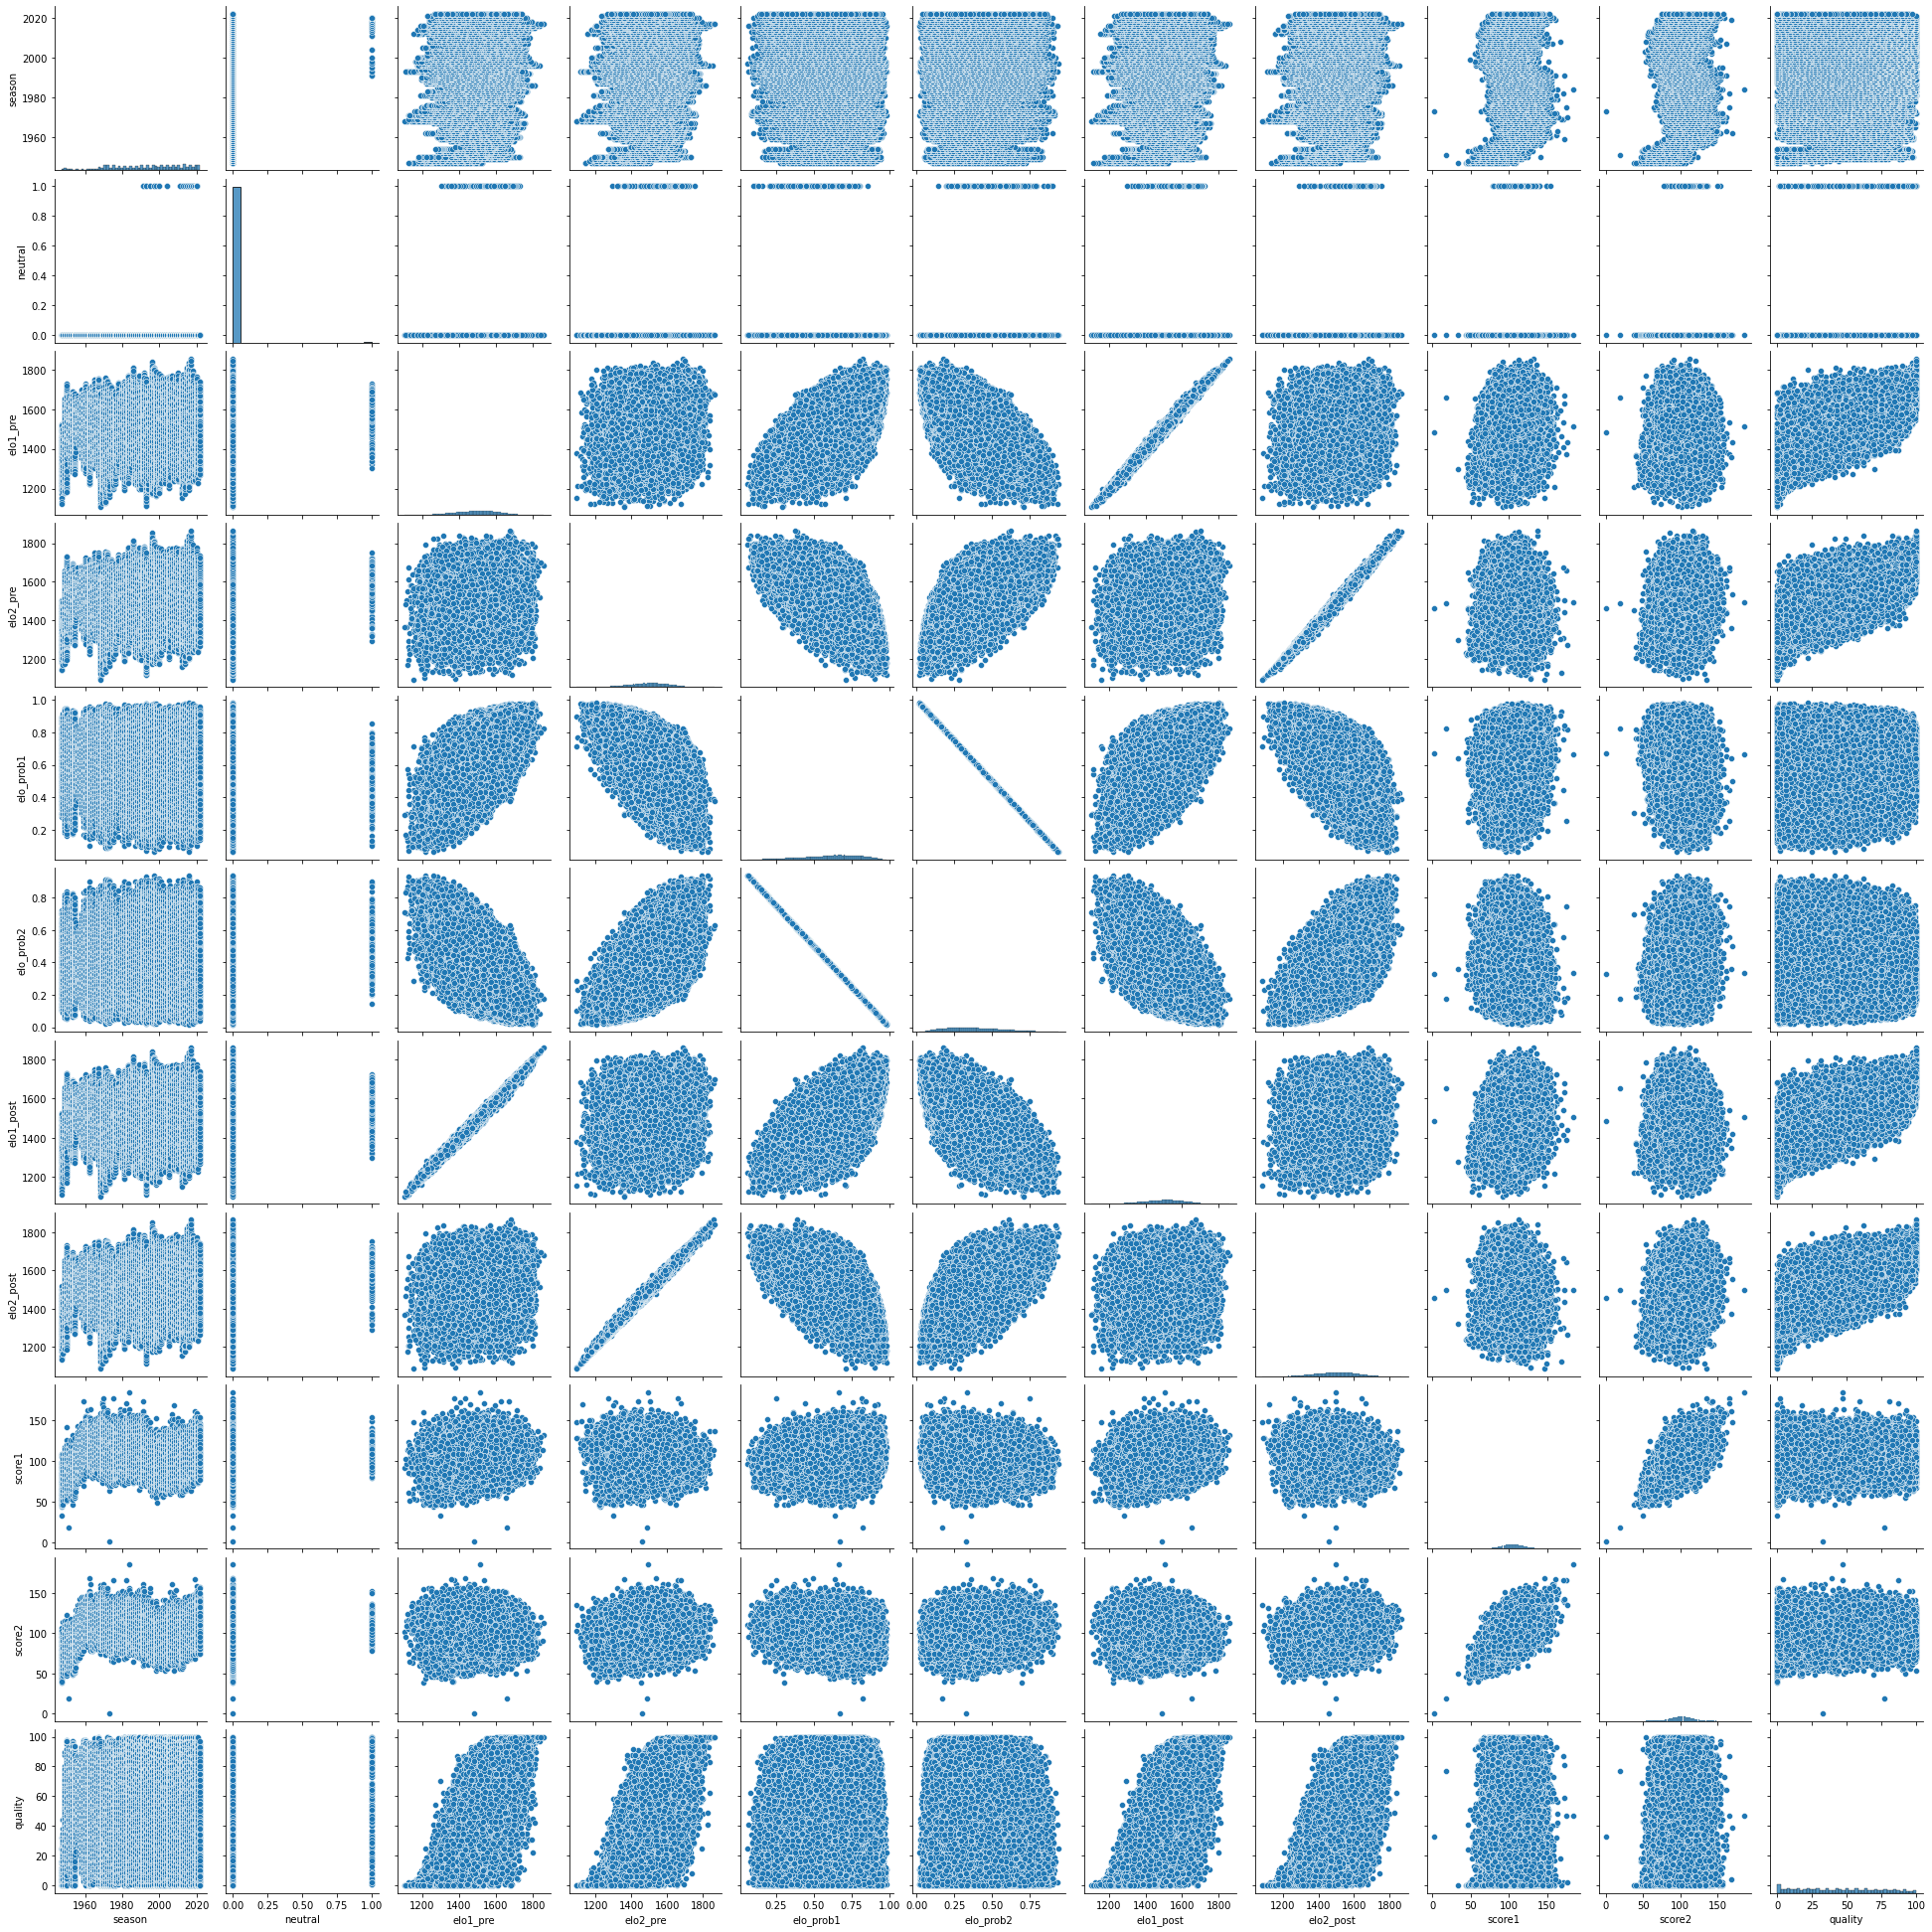

In [41]:
sns.pairplot(df)
plt.show()

# Bar Chart

<AxesSubplot:xlabel='season', ylabel='team2'>

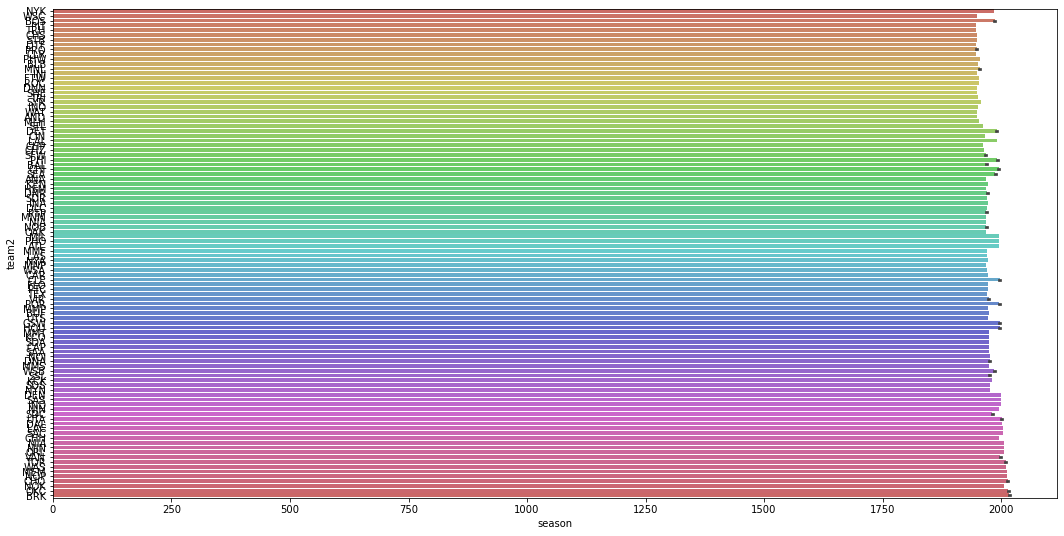

In [43]:
fig = plt.figure(figsize = (18,9))
sns.barplot(x = 'season', y = 'team2', palette = 'hls', data = df)

<AxesSubplot:xlabel='season', ylabel='score1'>

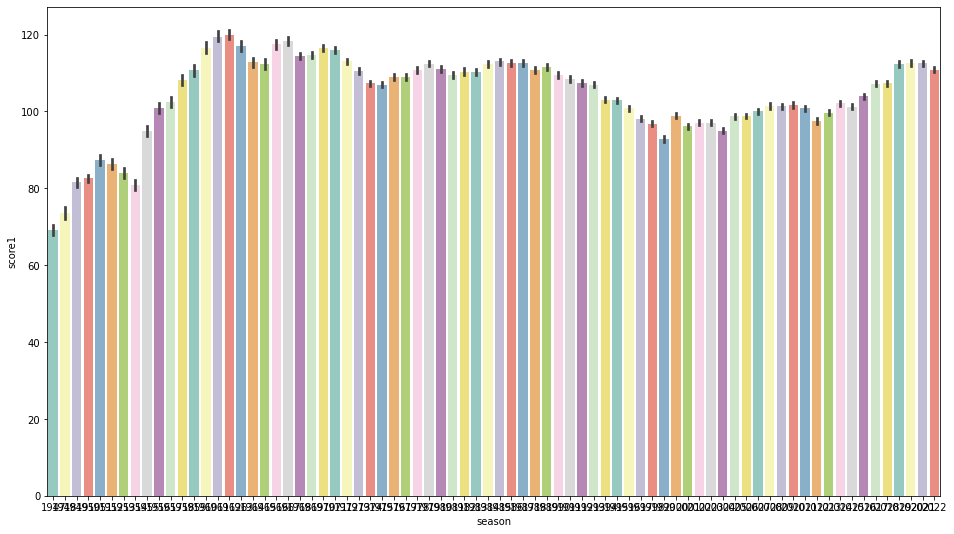

In [44]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = 'season', y = 'score1', palette = 'Set3', data = df)

# Pie chart 

<AxesSubplot:ylabel='season'>

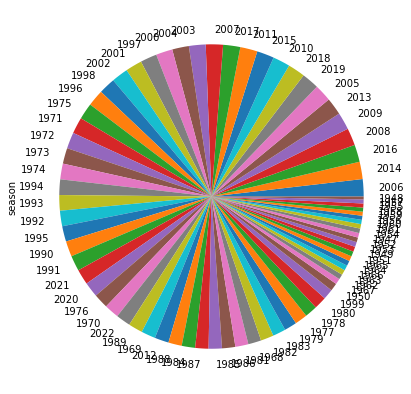

In [46]:
plt.figure(figsize=(14,7))
df['season'].value_counts().plot.pie()

<AxesSubplot:ylabel='quality'>

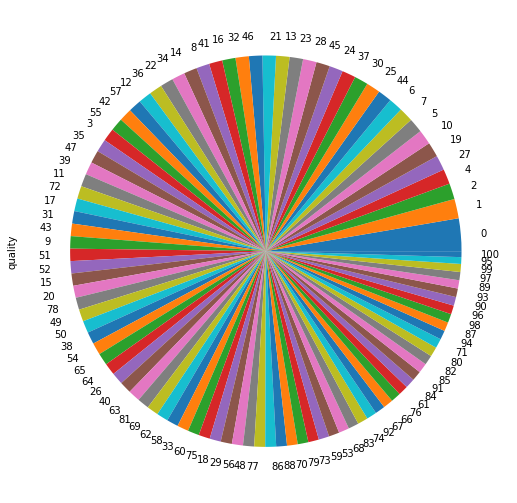

In [50]:
plt.figure(figsize=(16,9))
df['quality'].value_counts().plot.pie()

# Implementation Correlation Analysis

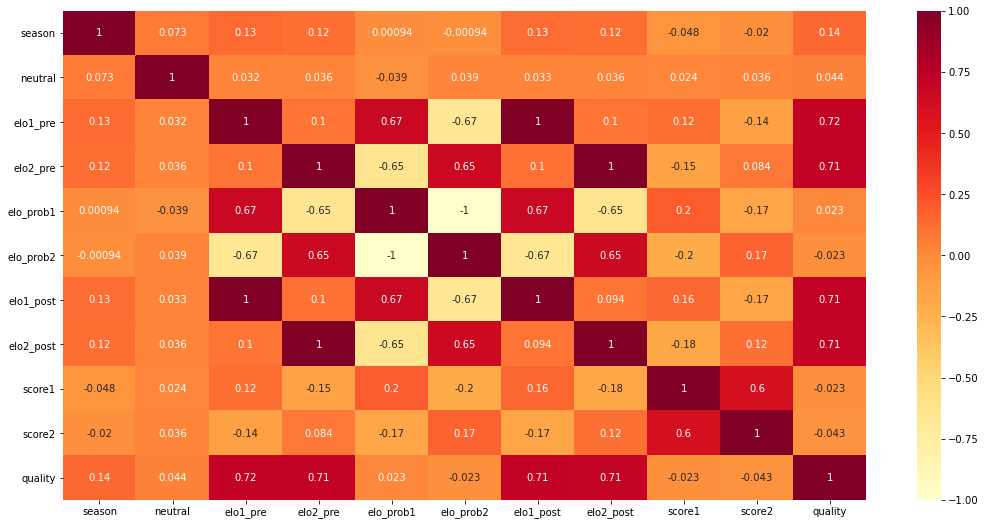

In [47]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot = True, cmap="YlOrRd")
plt.show()

# Histogram

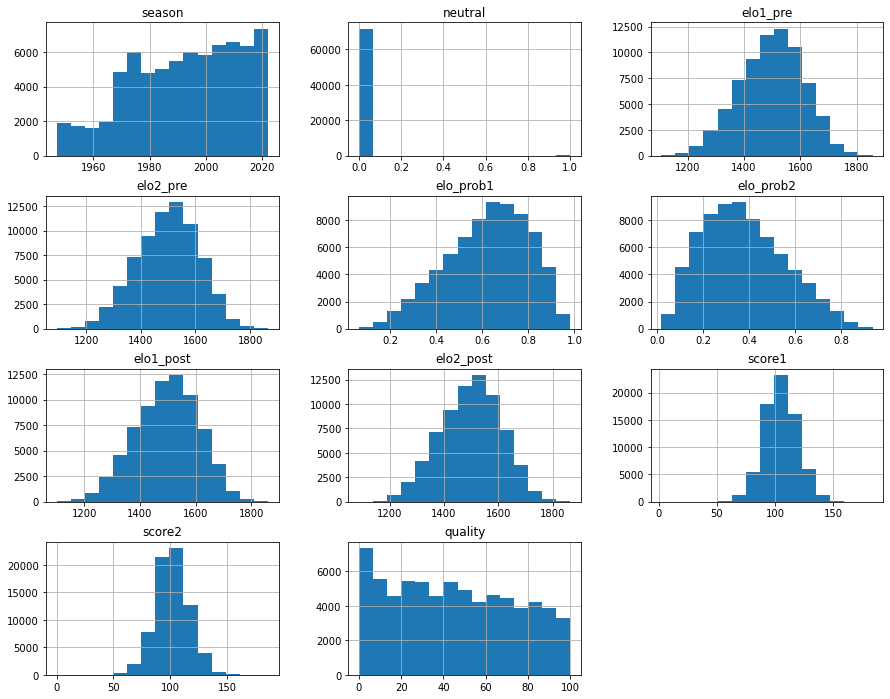

In [48]:
df.hist(figsize=(15,12),bins = 15)
plt.show()